# Sub-Functions
Functions that will be used within the primary approximation function

In [47]:
## Functions for f(x) and f^(n)(x), MODIFY as necessary
def f(x_val):
    """
    Ouputs y-values corresponding to x-values.
    
    Input:
        x-values (1D Array, float64)
    
    Output:
        y-values (1D Array, float64)
    """
    from numpy import sin # Import sin(x) function
    
    return sin(x_val ** 2) + x_val # Return f(x)=sin(x^2)+x



def fn(x_val):
    """
    Ouputs ACTUAL y-values to the nth derivative corresponding to x-values.
    
    Input:
        x-values (1D Array, float64)
    
    Output:
        y-values (1D Array, float64)
    """
    from numpy import cos # Import cos(x) function
    
    return 2 * x_val * cos(x_val ** 2) + 1 # Return first derivative f'(x)=2x*cos(x^2)+1



def deriv_matrix(size,order):
    """
    Creates a square matrix that discretizes the derivative of a function.
    The order of derivation is achieved by taking the matrix to the power of it.
    
    Note that the matrix will be int8 by default unless the order is not an integer.
    
    Input:
        The size of the nxn matrix (integer, int8)
        The order of the planned derivative (float, float64)
    
    Output:
        2D Array
    """
    import numpy as np # Array library
    from scipy.linalg import fractional_matrix_power # Function for float power of matrix
    
    ## Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal -1's
    if order%1 == 0: # If the order is an integer, any powers will automatically be integers as well
        matrix = np.zeros((size-1,size-1), dtype = "int64")
    else: # Otherwise, fractional powers will likely create floats
        matrix = np.zeros((size-1,size-1))
    np.fill_diagonal(matrix, int(-1))
    
    
    
    ## Add a row above and column to the right, then make the diagonal 1
    if order%1 == 0:
        row = np.zeros((size-1,1), dtype = "int8")
    else:
        row = np.zeros((size-1,1))
    matrix = np.hstack((matrix, row))
    
    if order%1 == 0:
        column = np.zeros((1,size), dtype = "int8")
    else:
        column = np.zeros((1,size))
    matrix = np.vstack((column, matrix))
    
    np.fill_diagonal(matrix, int(1))
    
    
    ## Apply the order of the planned derivative to the matrix
    # If the power is 1, we can skip everything
    if order != 1:
        if order%1 == 0: # If the power is an integer, we do this command
            matrix = np.linalg.matrix_power(matrix,order)
        else: # Otherwise we use a different command
            matrix = fractional_matrix_power(matrix,order)

    return matrix



def graph(x_val,yn_approx,yn_actual):
    """
    Creates graphs of x-values in relation to both the approximated and actual y-values.
    
    Input:
        x-values (1D Array, float64)
        Approximated y-values (1D Array, float64)
        Actual y-values (1D Array, float64)
    
    Output:
        Graph of the approximated and actual functions overlaid
        Graph of the absolute error (absolute value of approx-actual)
    """
    import matplotlib.pyplot as plt # Import graphing functions
    import numpy as np # Import array modification library
    
    ## Set up two subplots
    plt.figure(figsize=(16,7)) # Set size of plots
    plt.subplots_adjust(wspace = 0.3, hspace = 0.4) # Set spacing between plots
    
    
    
    ## Create first subplot for displaying both graphs
    plt.subplot(1,2,1)
    
    # Set up cosmetic qualities
    plt.title("Approximated vs Actual Outputs")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    
    # Plot data and label it
    plt.plot(x_val,yn_approx, color="red", linestyle="dashed", label="Approximated Values")
    plt.plot(x_val,yn_actual, color="black", label="Actual Values")
    plt.legend()
    
    
    
    ## Create second subplot for showing absolute error
    plt.subplot(1,2,2)
    
    # Set up cosmetic qualities
    plt.title("Absolute Error in Y")
    plt.xlabel("X")
    plt.ylabel("Absolute Error")
    plt.grid()
    
    # Create absolute error array
    abs_error = abs(yn_approx - yn_actual)
    
    # Plot values
    plt.plot(x_val,abs_error, color="red")
    
    
    
    ## Show plot
    plt.show()

# Primary Function
Main function that will be used to approximate the derivative of a given function

In [52]:
def deriv_aprox(d_order,x_min,x_max,x_int):
    """
    Approximates the nth order derivative of the pre-defined function f(x) based on inputted x-values.
    
    Input:
        Order of the derivative (integer or float)
        Minimum x-value (integer or float)
        Maximum x-value (integer or float)
        Number of x-subintervals (integer)
    
    Output:
        Approximated and actual graph overlayed
        Absolute Error Graph
        Total runtime (seconds)
    """
    import numpy as np # Import array library
    from time import time # Time function for giving runtime
    begin = time()
    
    ## Create pre-defined arrays
    # Create x-values based on min, max, and subintevals
    x_val = np.linspace(x_min, x_max, x_int+1)
    x_dist = (x_max - x_min) / x_int # Specifies distance between all x-values
    
    # Create y-values
    y_val = f(x_val)
    
    # Generate derivative matrix
    D_mat = deriv_matrix(x_int+1, d_order)
    
    
    
    ## Compute nth order derivative
    # Compute APPROXIMATED yn values
    yn_approx = x_dist ** (-d_order) * np.matmul(D_mat, y_val)
    # Compute ACTUAL yn values
    yn_actual = fn(x_val)
    

    graph(x_val,yn_approx,yn_actual)

# Querries
Cell for testing functions

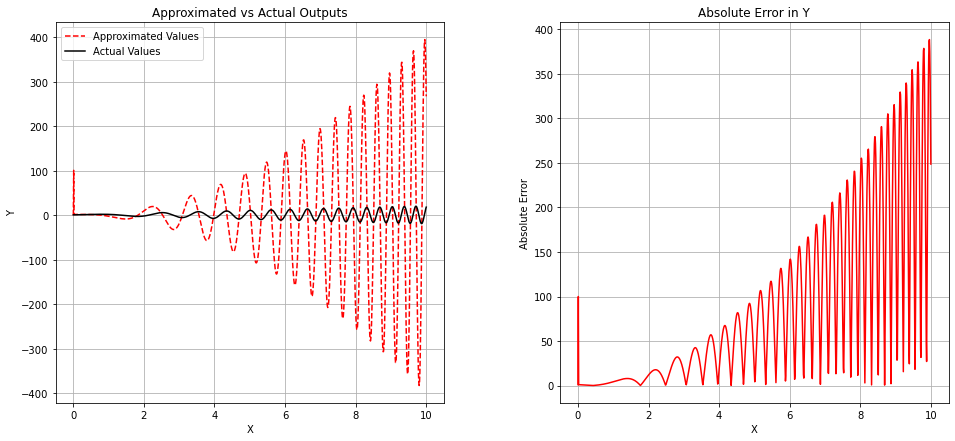

In [56]:
deriv_aprox(2,0,10,1000)